In [1]:
import comet_ml
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from comet_ml.query import Tag
from comet_ml.query import Parameter 
from comet_ml import API


In [3]:
ssim_80_100_list = []
rmse_80_100_list = []
mae_80_100_list = []
psnr_80_100_list = []
api = API(api_key="VaG6pF4qhcqKJOux0daNkIz2C")
for i in range(80, 101, 1):
    compression_rate = i
    # print(compression_rate)
    tagged = Tag("score_2")
    compression_rate_params = Parameter('compression_rate')
    query = ((compression_rate_params == compression_rate) & tagged)
    experiments = api.query("ohtani", "jpeg-compression", query)
    ssim_list = experiments[0].get_metrics("ssim")
    psnr_list = experiments[0].get_metrics("psnr")
    mae_list = experiments[0].get_metrics("mae")
    rmse_list = experiments[0].get_metrics("rmse")
    exec_command_ssim_list = 'ssim_' + str(compression_rate) + '= []' 
    exec(exec_command_ssim_list)
    exec_command_psnr_list = 'psnr_' + str(compression_rate) + '= []' 
    exec(exec_command_psnr_list)
    exec_command_mae_list = 'mae_' + str(compression_rate) + '= []' 
    exec(exec_command_mae_list)
    exec_command_rmse_list = 'rmse_' + str(compression_rate) + '= []' 
    exec(exec_command_rmse_list)
    for j in range(len(ssim_list)):
        ssim_score = ssim_list[j].get("metricValue")
        exec_command_ssim_append = 'ssim_' + str(compression_rate) + '.append(ssim_score)'
        exec(exec_command_ssim_append)

    for j in range(len(psnr_list)):
        psnr_score = psnr_list[j].get("metricValue")
        exec_command_psnr_append = 'psnr_' + str(compression_rate) + '.append(psnr_score)'
        exec(exec_command_psnr_append)

    for j in range(len(mae_list)):
        mae_score = mae_list[j].get("metricValue")
        exec_command_mae_append = 'mae_' + str(compression_rate) + '.append(mae_score)'
        exec(exec_command_mae_append)

    for j in range(len(rmse_list)):
        rmse_score = rmse_list[j].get("metricValue")
        exec_command_rmse_append = 'rmse_' + str(compression_rate) + '.append(rmse_score)'
        exec(exec_command_rmse_append)

    exec_command_ssim = 'ssim_80_100_list.append(ssim_' + str(compression_rate) + ')'
    exec(exec_command_ssim)
    exec_command_psnr = 'psnr_80_100_list.append(psnr_' + str(compression_rate) + ')'
    exec(exec_command_psnr)
    exec_command_mae = 'mae_80_100_list.append(mae_' + str(compression_rate) + ')'
    exec(exec_command_mae)
    exec_command_rmse = 'rmse_80_100_list.append(rmse_' + str(compression_rate) + ')'
    exec(exec_command_rmse)




SSIM


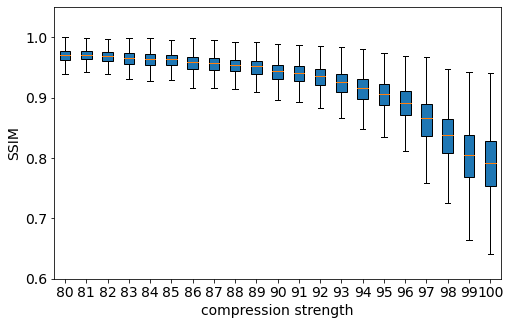

In [5]:
for i in range(len(ssim_80_100_list)):
    for j in range(len(ssim_80_100_list[i])):
        ssim_80_100_list[i][j] = float(ssim_80_100_list[i][j])

labels = list(range(80, 101, 1))
boxplt = plt.boxplot(ssim_80_100_list, labels=labels, showfliers=False, patch_artist=True)
# boxplt = plt.boxplot(ssim_80_100_list, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('SSIM')
# plt.title('ssim')
plt.ylim(0.6,1.05)
# plt.xlim(80, 102)
# plt.xticks(rotation=60) #横軸目盛りを30度傾ける
# plt.xticks(np.arange(80, 103, step=5))
# plt.xticks(np.arange(80, 100, 2))
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
plt.savefig('../images/score_fig/80_100/ssim_80_100.pdf')
plt.show()

PSNR

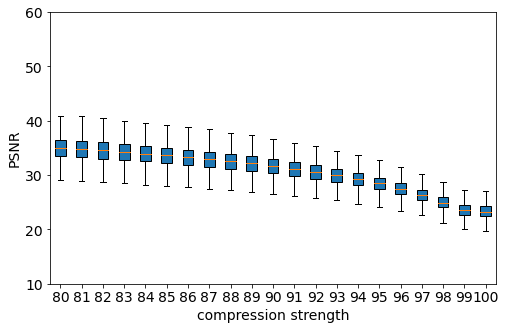

In [6]:
for i in range(len(psnr_80_100_list)):
    for j in range(len(psnr_80_100_list[i])):
        psnr_80_100_list[i][j] = float(psnr_80_100_list[i][j])

labels = list(range(80, 101, 1))
boxplt = plt.boxplot(psnr_80_100_list, labels=labels, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('PSNR')
# plt.title('psnr')
plt.ylim(10, 60)
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
plt.savefig('../images/score_fig/80_100/psnr_80_100.pdf')
plt.show()

MAE

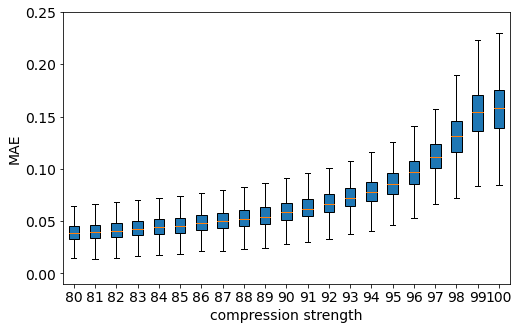

In [7]:
for i in range(len(mae_80_100_list)):
    for j in range(len(mae_80_100_list[i])):
        mae_80_100_list[i][j] = float(mae_80_100_list[i][j])

labels = list(range(80, 101, 1))
boxplt = plt.boxplot(mae_80_100_list, labels=labels, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('MAE')
# plt.title('mae')
plt.ylim(-0.01,0.25)
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
plt.savefig('../images/score_fig/80_100/mae_80_100.pdf')
plt.show()

RMSE

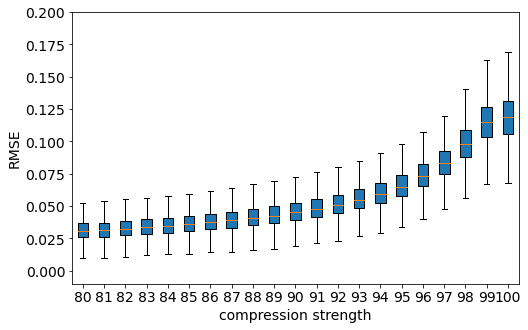

In [8]:
for i in range(len(rmse_80_100_list)):
    for j in range(len(rmse_80_100_list[i])):
        rmse_80_100_list[i][j] = float(rmse_80_100_list[i][j])

labels = list(range(80, 101, 1))
boxplt = plt.boxplot(rmse_80_100_list, labels=labels, showfliers=False, patch_artist=True)
plt.xlabel('compression strength')
plt.ylabel('RMSE')
# plt.title('rmse')
plt.ylim(-0.01,0.2)
parameters = {'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        "figure.figsize": (8, 5),
        }
plt.rcParams.update(parameters) 
plt.savefig('../images/score_fig/80_100/rmse_80_100.pdf')
plt.show()